In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [2]:
# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/munge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/munge/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Data Loading and Exploration

In [3]:
# Load the dataset
data_path = 'datasets/imdb_dataset.csv'
df = pd.read_csv(data_path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


There are 50000 rows in the dataset with 2 columns; review and sentiment (whether positive or negative) and there are no missing values in the dataset

In [5]:
# Add a column for review length
df['review_length'] = df['review'].apply(len)

In [6]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


### Data Preprocessing

In [7]:
# Convert all reviews to lowercase
df['review'] = df['review'].str.lower().str.strip()

In [8]:
df.head()

,review,sentiment,review_length
0,one of the other reviewers has mentioned that ...,positive,1761
1,a wonderful little production. <br /><br />the...,positive,998
2,i thought this was a wonderful way to spend ti...,positive,926
3,basically there's a family where a little boy ...,negative,748
4,"petter mattei's ""love in the time of money"" is...",positive,1317


In [9]:
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
     # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

In [10]:
df['cleaned_review'] = df['review'].apply(preprocess_text)

In [11]:
df.head()

,review,sentiment,review_length,cleaned_review
0,one of the other reviewers has mentioned that ...,positive,1761,one reviewers mentioned watching 1 oz episode ...
1,a wonderful little production. <br /><br />the...,positive,998,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,748,basically family little boy jake thinks zombie...
4,"petter mattei's ""love in the time of money"" is...",positive,1317,petter mattei love time money visually stunnin...


In [12]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = (df['sentiment'] == 'positive').astype(int)

### Model Building

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/munge/.virtual-envs/ml-venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Model training

In [16]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8278 - loss: 0.3964 - val_accuracy: 0.8751 - val_loss: 0.2857
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9163 - loss: 0.2140 - val_accuracy: 0.8742 - val_loss: 0.2988
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9397 - loss: 0.1600 - val_accuracy: 0.8715 - val_loss: 0.3357
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9783 - loss: 0.0700 - val_accuracy: 0.8677 - val_loss: 0.5064
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.8669 - val_loss: 0.6802
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9998 - loss: 0.0028 - val_accuracy: 0.8662 - val_loss: 0.8775
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 4.3507e-04 - val_accuracy: 0.8650 - val_loss: 1.0015
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 1.349

### Model Evaluation

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.87


In [29]:
# Predictions and classification report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4961
           1       0.86      0.89      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



The model has an accuracy score of 87% based off the f1-score which means it has a high probability rate of predicting whether a movie has a positive or negative review

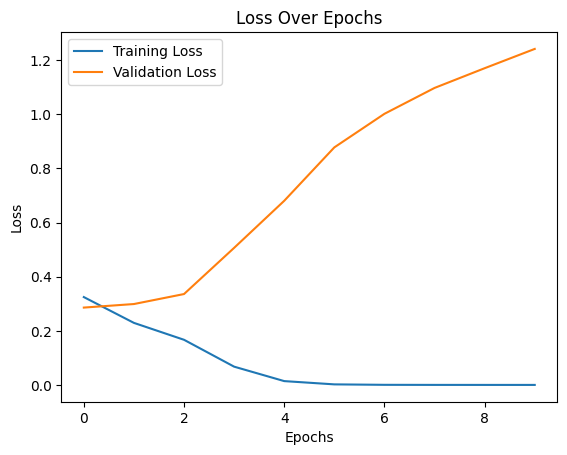

In [27]:
# Plot training and validation loss over epochs.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

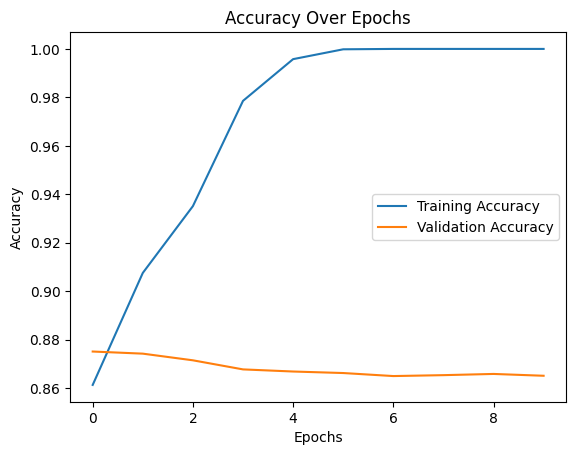

In [28]:
# Plot training and validation accuracy over epochs.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()